# HEART DISEASE PREDICTION AND ANALYSIS USING MACHINE LEARNING


In this project, we delve into a dataset encapsulating various health metrics from __heart patients__, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

# Implementation

## Data Exploration
Uncover patterns, distributions, and relationships within the data.

## In-Depth Exploratory Data Analysis (EDA)
Dive deep into univariate analysis and bivariate relationships against the target variable.

## Data Preprocessing
- **Remove Irrelevant Features:** Exclude features that do not contribute to the analysis.
- **Address Missing Values:** Handle missing data using appropriate techniques (e.g., imputation).
- **Treat Outliers:** Identify and manage outliers that could skew results.
- **Encode Categorical Variables:** Transform categorical data into numerical format.
- **Transform Skewed Features:** Adjust features to achieve a distribution closer to normal.

## Model Building
- **Pipeline Setup:** Establish pipelines for models requiring feature scaling.
- **Implement Classification Models:** Tune and evaluate models such as KNN, SVM, Decision Trees, and Random Forests.
- **Focus on Recall for Class 1:** Ensure high recall to comprehensively identify heart patients.

## Model Evaluation and Comparison
Evaluate and compare model performance using metrics like precision, recall, and F1-score to determine their effectiveness.


In [142]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [143]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

In [144]:
# Read dataset
df = pd.read_csv(r"C:\Users\prita\Downloads\heart (1).csv")
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dataset Overview

| **Feature**  | **Description** |
|:-------------|:----------------|
| **age**      | Age of the patient in years |
| **sex**      | Gender of the patient (0 = male, 1 = female) |
| **cp**       | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| **trestbps** | Resting blood pressure in mm Hg |
| **chol**     | Serum cholesterol in mg/dl |
| **fbs**      | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) |
| **restecg**  | Resting electrocardiographic results: <br> 0: Normal <br> 1: ST-T wave abnormality <br> 2: Possible left ventricular hypertrophy |
| **thalach**  | Maximum heart rate achieved during a stress test |
| **exang**    | Exercise-induced angina (1 = yes, 0 = no) |
| **oldpeak**  | ST depression induced by exercise relative to rest |
| **slope**    | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |
| **ca**       | Number of major vessels (0-4) colored by fluoroscopy |
| **thal**     | Thallium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not specified |
| **target**   | Heart disease status (0 = no disease, 1 = presence of disease) |


## Dataset Basic Information

In [145]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Inferences

* **Number of Entries**: The dataset contains 303 entries, with indices ranging from 0 to 302.

* **Columns**: There are 14 columns, representing various patient attributes and test results.

* **Data Types**:
    - 13 out of 14 columns are of type `int64`.
    - The `oldpeak` column is of type `float64`.

* **Missing Values**: No missing values are present, as all columns have 303 non-null entries.


## Note

Although 9 columns (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are stored as numerical data, they actually represent categories. To analyze them properly, these columns should be converted to a string (`object`) data type.


In [146]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object



Let's delve into the summary statistics for our __numerical__ attributes:

In [147]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Numerical Features

* **`age`**: The average age is around 54.4 years, with ages ranging from 29 to 77 years.
* **`trestbps`**: The average resting blood pressure is about 131.6 mm Hg, with a range from 94 to 200 mm Hg.
* **`chol`**: The average cholesterol level is approximately 246.3 mg/dl, ranging from 126 to 564 mg/dl.
* **`thalach`**: The average maximum heart rate achieved is around 149.7, with a range from 71 to 202.
* **`oldpeak`**: The average ST depression due to exercise is about 1.04, with values ranging from 0 to 6.2.




Afterward, let's look at the summary statistics of the categorical features:

In [148]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


## Categorical Features

* **`sex`**: There are two values. Males (0) are the most common, appearing 207 times out of 303 entries.
* **`cp`**: Four types of chest pain. Type "0" is the most frequent, occurring 143 times.
* **`fbs`**: Two categories. The most common is "0" (fasting blood sugar < 120 mg/dl), appearing 258 times.
* **`restecg`**: Three results. The most common is "1", which appears 152 times.
* **`exang`**: Two values. "0" (no exercise-induced angina) is the most frequent, appearing 204 times.
* **`slope`**: Three slopes. Type "2" is the most common, occurring 142 times.
* **`ca`**: Five values for major vessels. "0" is the most frequent, appearing 175 times.
* **`thal`**: Four results. Type "2" (reversible defect) is the most common, observed 166 times.
* **`target`**: Two values indicating heart disease. "1" (disease present) is the most frequent, seen in 165 entries.


# Exploratory Data Analysis (EDA)



We will approach EDA in two main steps:

1. **Univariate Analysis**: Examine each feature individually to understand its distribution and range.

2. **Bivariate Analysis**: Explore how each feature relates to the target variable to determine its importance and impact.

These steps will help us understand both the individual features and their relationship with the target variable for better predictions.


## 1. Univariate Analysis

We perform univariate analysis based on the type of data:

* **Continuous Data**: Use histograms to visualize the distribution of each feature, helping us understand its central tendency, spread, and shape.

* **Categorical Data**: Use bar plots to show the frequency of each category, giving a clear view of how common each category is.

These visualizations help us understand the individual characteristics of each feature in the dataset.



###  Numerical Variables Univariate Analysis</span></b>  

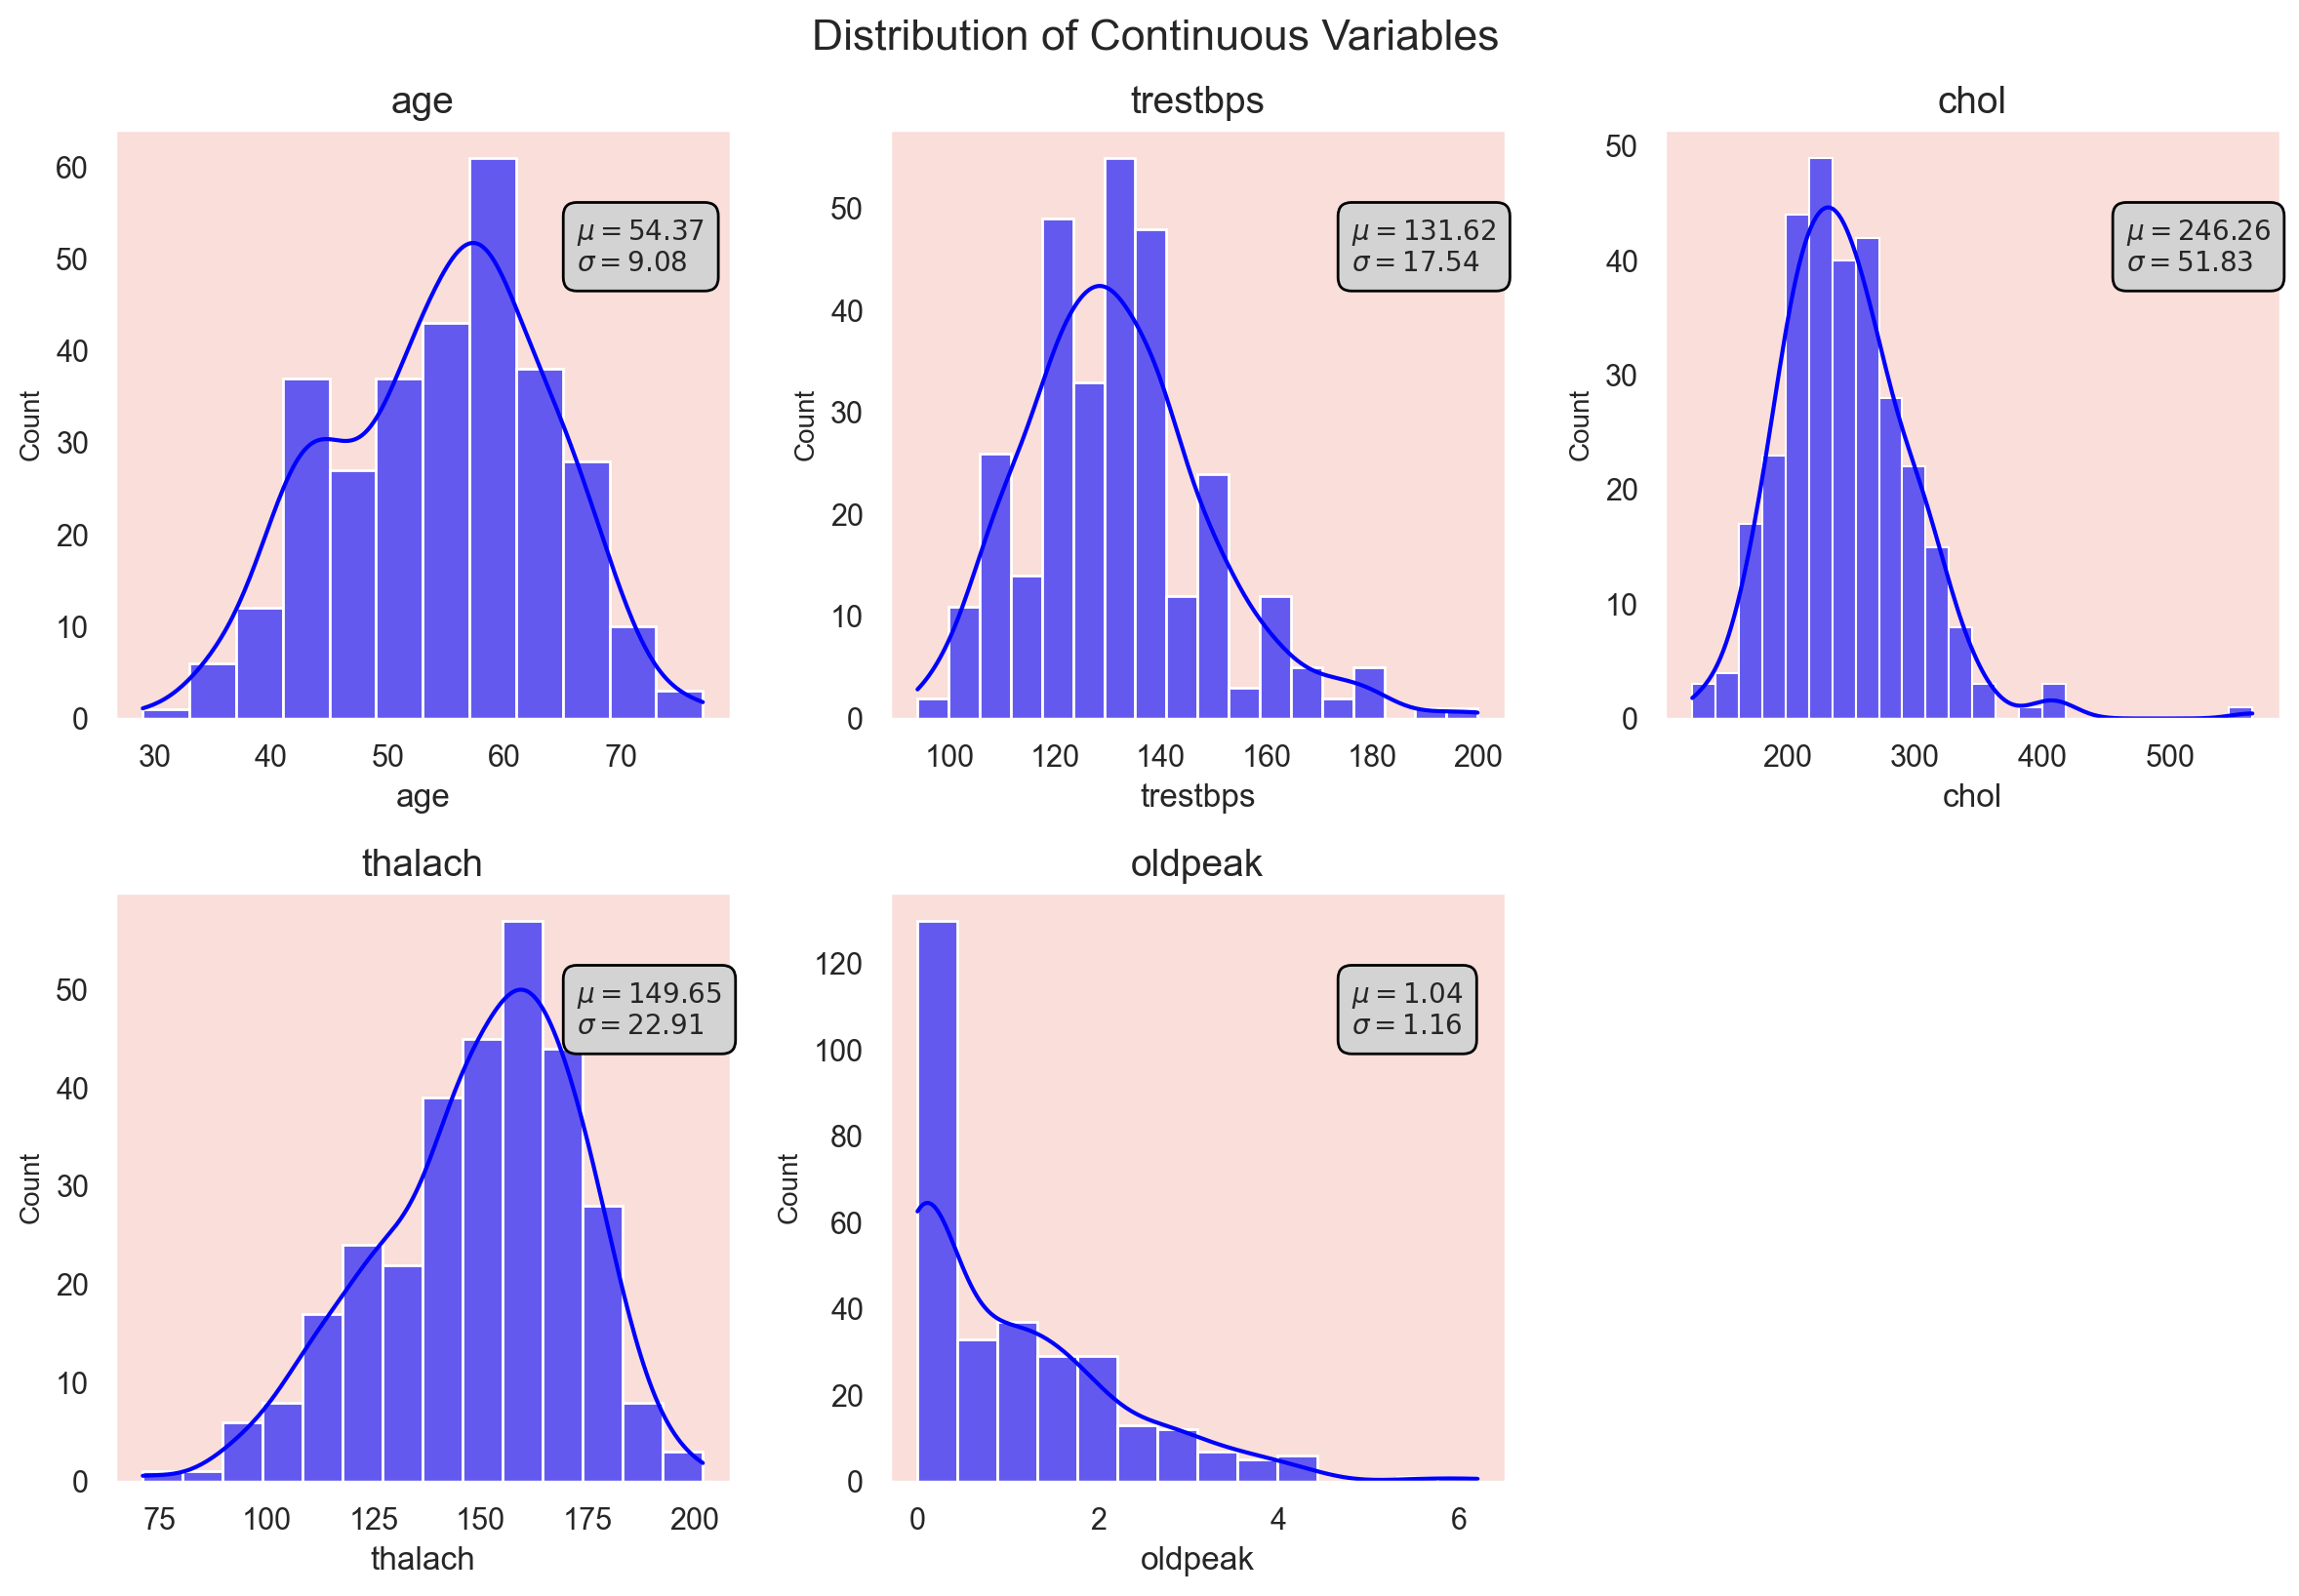

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter continuous features
df_continuous = df[continuous_features]

# Create a single figure
plt.figure(figsize=(12, 8))

# Number of features
num_features = len(df_continuous.columns)

# Plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    
    # Plot histogram with KDE
    sns.histplot(df_continuous[col], kde=True, color='blue', alpha=0.6)
    
    # Add labels and title
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=10)
    plt.title(f'{col}', fontsize=14)
    
    # Display mean and standard deviation
    mean = df_continuous[col].mean()
    std_dev = df_continuous[col].std()
    textstr = f'$\mu={mean:.2f}$\n$\sigma={std_dev:.2f}$'
    plt.text(0.75, 0.85, textstr, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='black', pad=0.5))
    
    # Remove grid lines
    plt.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Distribution of Continuous Variables', fontsize=16, y=1.02)
plt.show()

## Inferences

Based on our univariate analysis, we observe the following:

* **Age (`age`)**: The age distribution is fairly even but shows a peak around the late 50s. The average age is approximately 54.37 years, with a standard deviation of 9.08 years.

* **Resting Blood Pressure (`trestbps`)**: Most individuals have a resting blood pressure between 120-140 mm Hg. The average resting blood pressure is about 131.62 mm Hg, with a standard deviation of 17.54 mm Hg.

* **Serum Cholesterol (`chol`)**: Cholesterol levels are predominantly between 200 and 300 mg/dl. The mean cholesterol level is around 246.26 mg/dl, with a standard deviation of 51.83 mg/dl.

* **Maximum Heart Rate Achieved (`thalach`)**: The majority of individuals achieve a heart rate between 140 and 170 bpm during a stress test. The average heart rate achieved is approximately 149.65 bpm, with a standard deviation of 22.91 bpm.

* **ST Depression Induced by Exercise (`oldpeak`)**: Values are mainly close to 0, indicating that many individuals did not experience significant ST depression during exercise. The average ST depression is 1.04, with a standard deviation of 1.16.

Overall, the histograms of these continuous features align well with the provided descriptions and expected ranges, showing no noticeable issues or outliers in the data.



### Categorical Variables Univariate Analysis</span></b>  

In [150]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

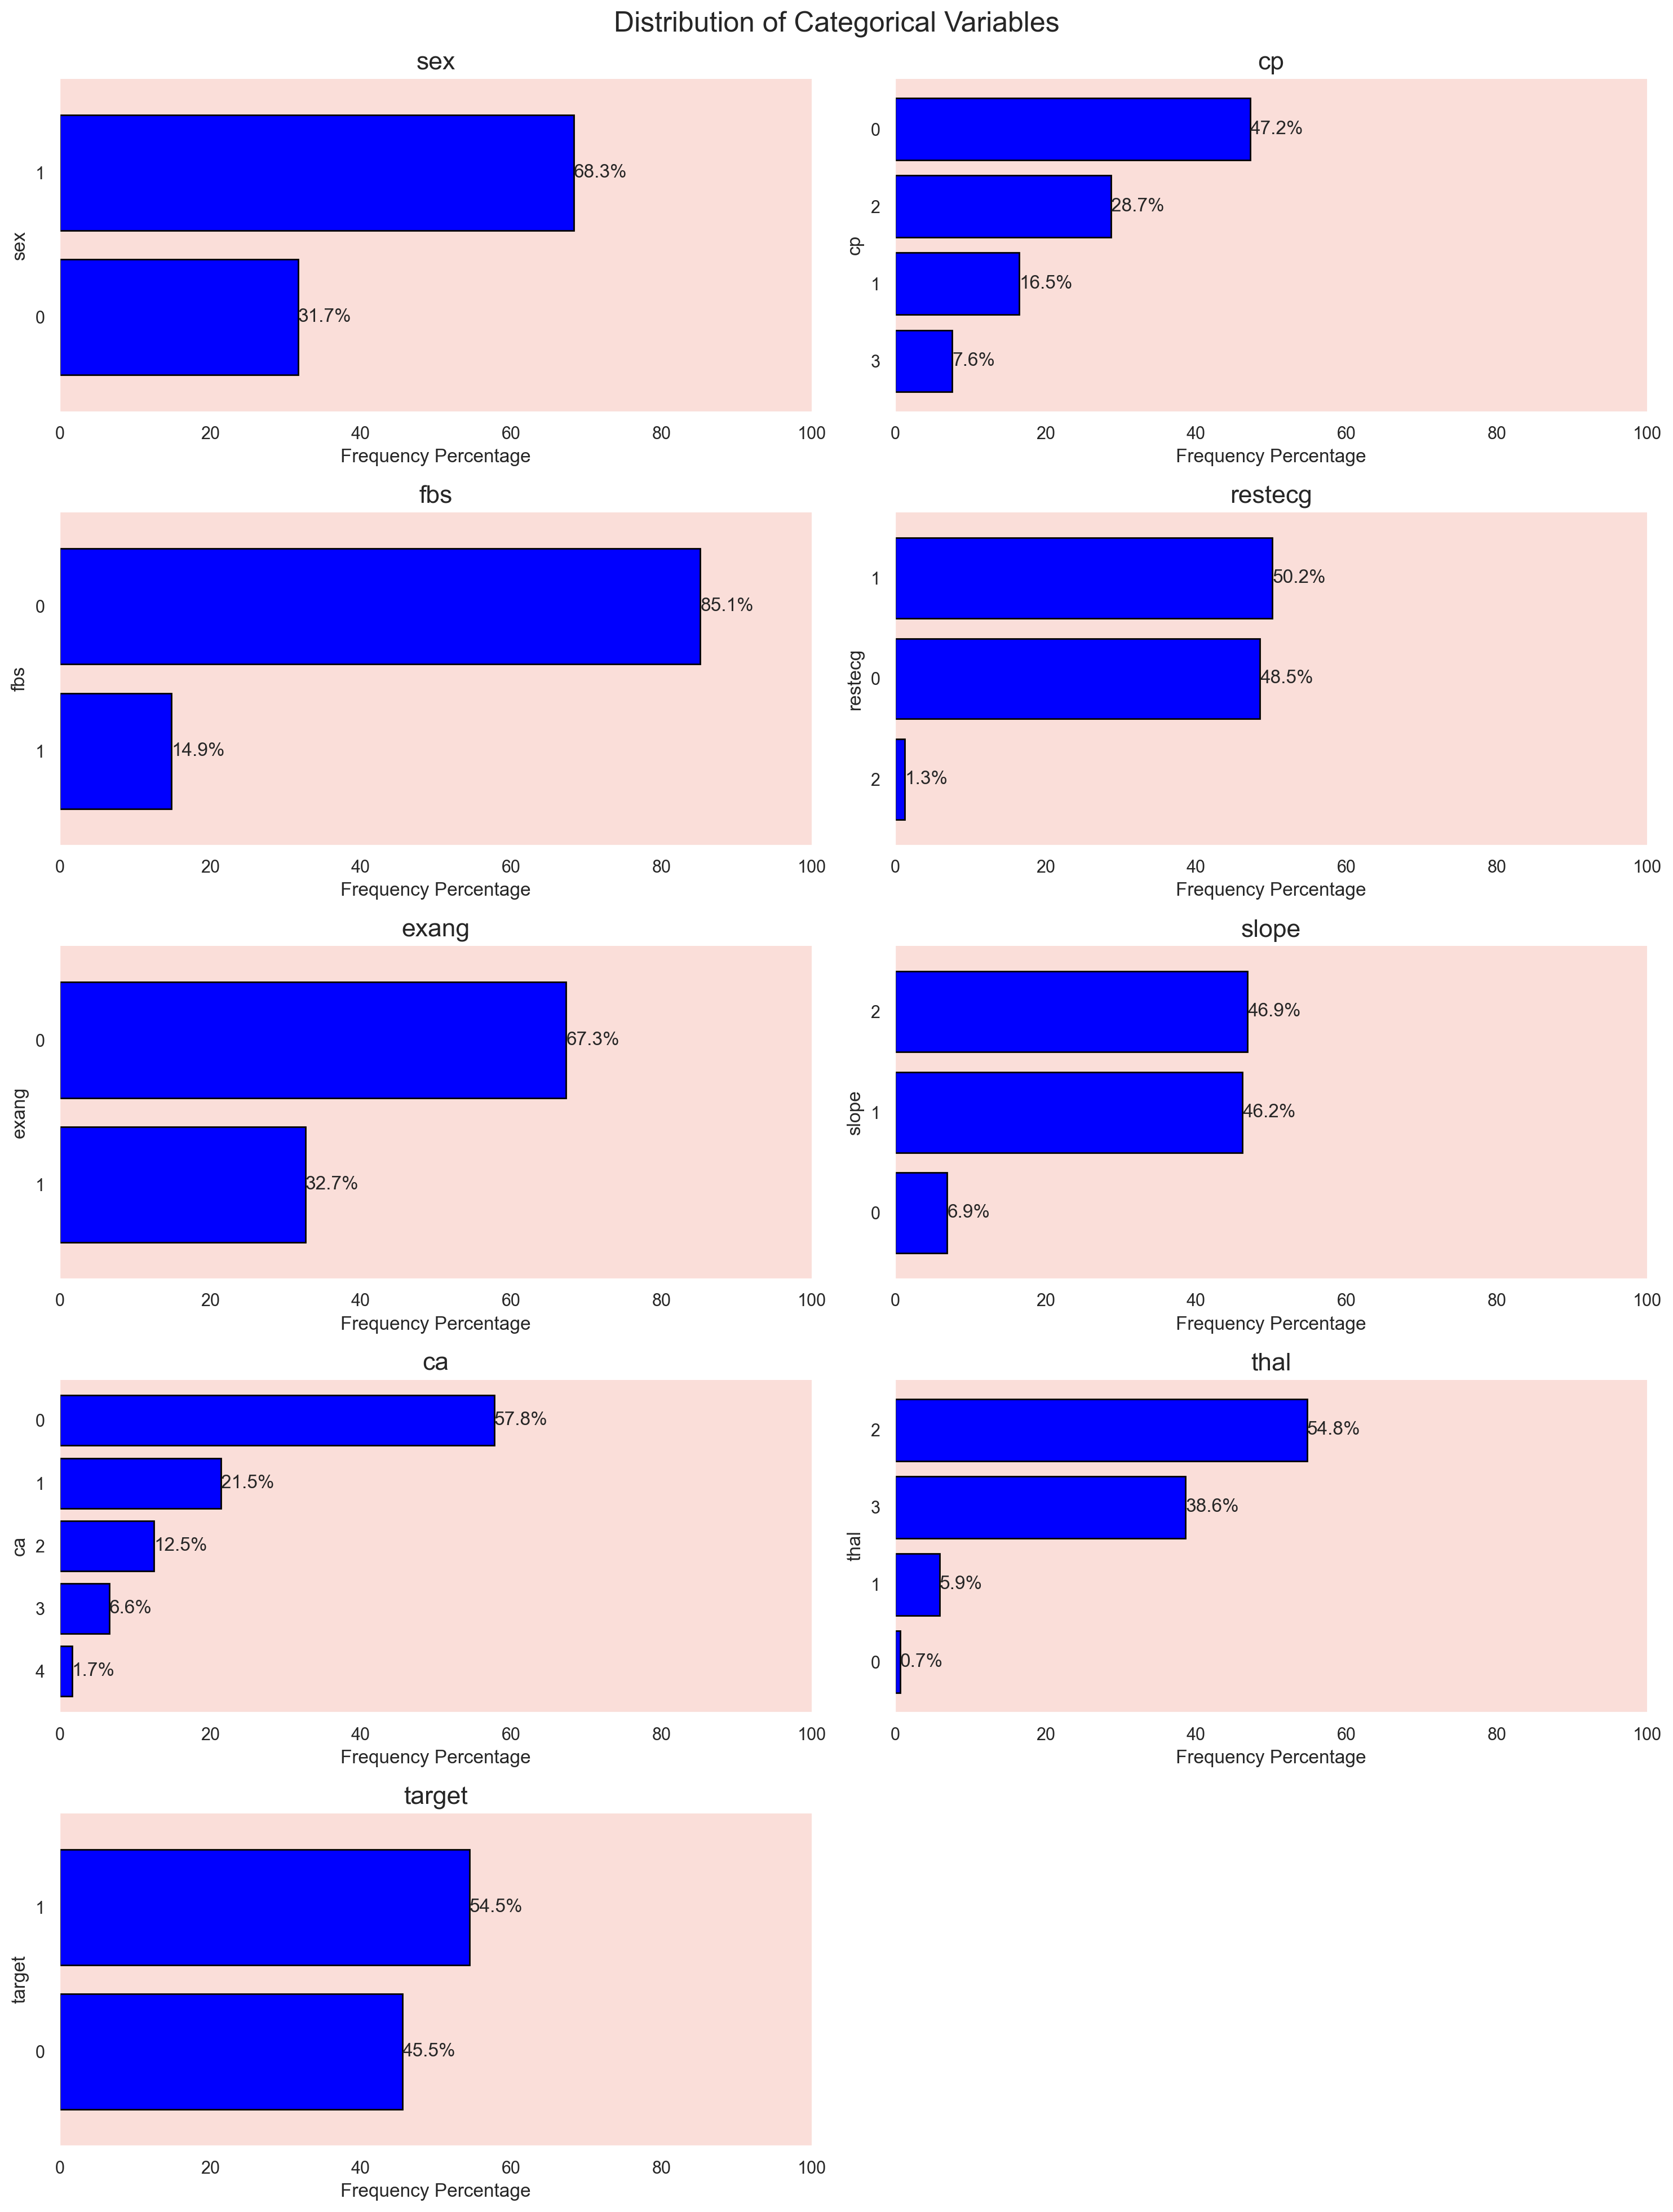

In [151]:
import matplotlib.pyplot as plt

# List of categorical features including 'target'
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Number of categorical features including 'target'
num_features = len(categorical_features)

# Set up the subplot for the appropriate number of features
fig, ax = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, (num_features + 1) // 2 * 4))

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='blue', edgecolor='black')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, f'{value:.1f}%', fontsize=12, va='center')
    
    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(col, fontsize=16)

    # Remove grid background and other unnecessary elements
    ax[row, col_idx].grid(False)  # Turn off the grid
    ax[row, col_idx].spines['top'].set_visible(False)  # Remove top spine
    ax[row, col_idx].spines['right'].set_visible(False)  # Remove right spine
    ax[row, col_idx].spines['left'].set_linewidth(0.5)  # Adjust left spine width
    ax[row, col_idx].spines['bottom'].set_linewidth(0.5)  # Adjust bottom spine width

# Hide any unused subplots
for j in range(num_features, len(ax.flatten())):
    ax.flatten()[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## Inferences:

* **Gender (`sex`)**: The dataset has a higher number of females compared to males.

* **Type of Chest Pain (`cp`)**: The most common chest pain type is 0 (Typical angina). Check the bar plots for exact distribution among all types.

* **Fasting Blood Sugar (`fbs`)**: Most patients have fasting blood sugar levels below 120 mg/dl, so high blood sugar is not common here.

* **Resting Electrocardiographic Results (`restecg`)**: The results vary, with some types being more common than others. Refer to the plots for details.

* **Exercise-Induced Angina (`exang`)**: Most patients do not have exercise-induced angina, suggesting it's not a frequent symptom in this dataset.

* **Slope of the Peak Exercise ST Segment (`slope`)**: Different slopes are present, with some being more common. See the plots for the distribution.

* **Number of Major Vessels Colored by Fluoroscopy (`ca`)**: Most patients have fewer major vessels colored, with '0' being the most frequent.

* **Thalium Stress Test Result (`thal`)**: Various test results are present, with some types being more frequent. Check the plots for specifics.

* **Presence of Heart Disease (`target`)**: The dataset is almost evenly split between those with heart disease (54.5%) and those without (45.5%).


## 2. Bivariate Analysis

To explore how features relate to the target variable:

* **Continuous Data**: We will use:
  - **Bar plots** to show the average value of each feature for different target classes.
  - **KDE plots** to understand the distribution of each feature across target classes.

* **Categorical Data**: We will use:
  - **100% stacked bar plots** to show the proportion of each category within the target classes.

These visualizations will help us understand how features relate to the target and identify potential predictors for heart disease.



### Numerical Features vs Target</span></b>  

## Continuous Feature Analysis

To analyze each continuous feature against the target, we will use:

* **Bar Plots** - to show the average values of the feature for each target class.
* **KDE Plots** - to display the distribution of the feature across different target categories.


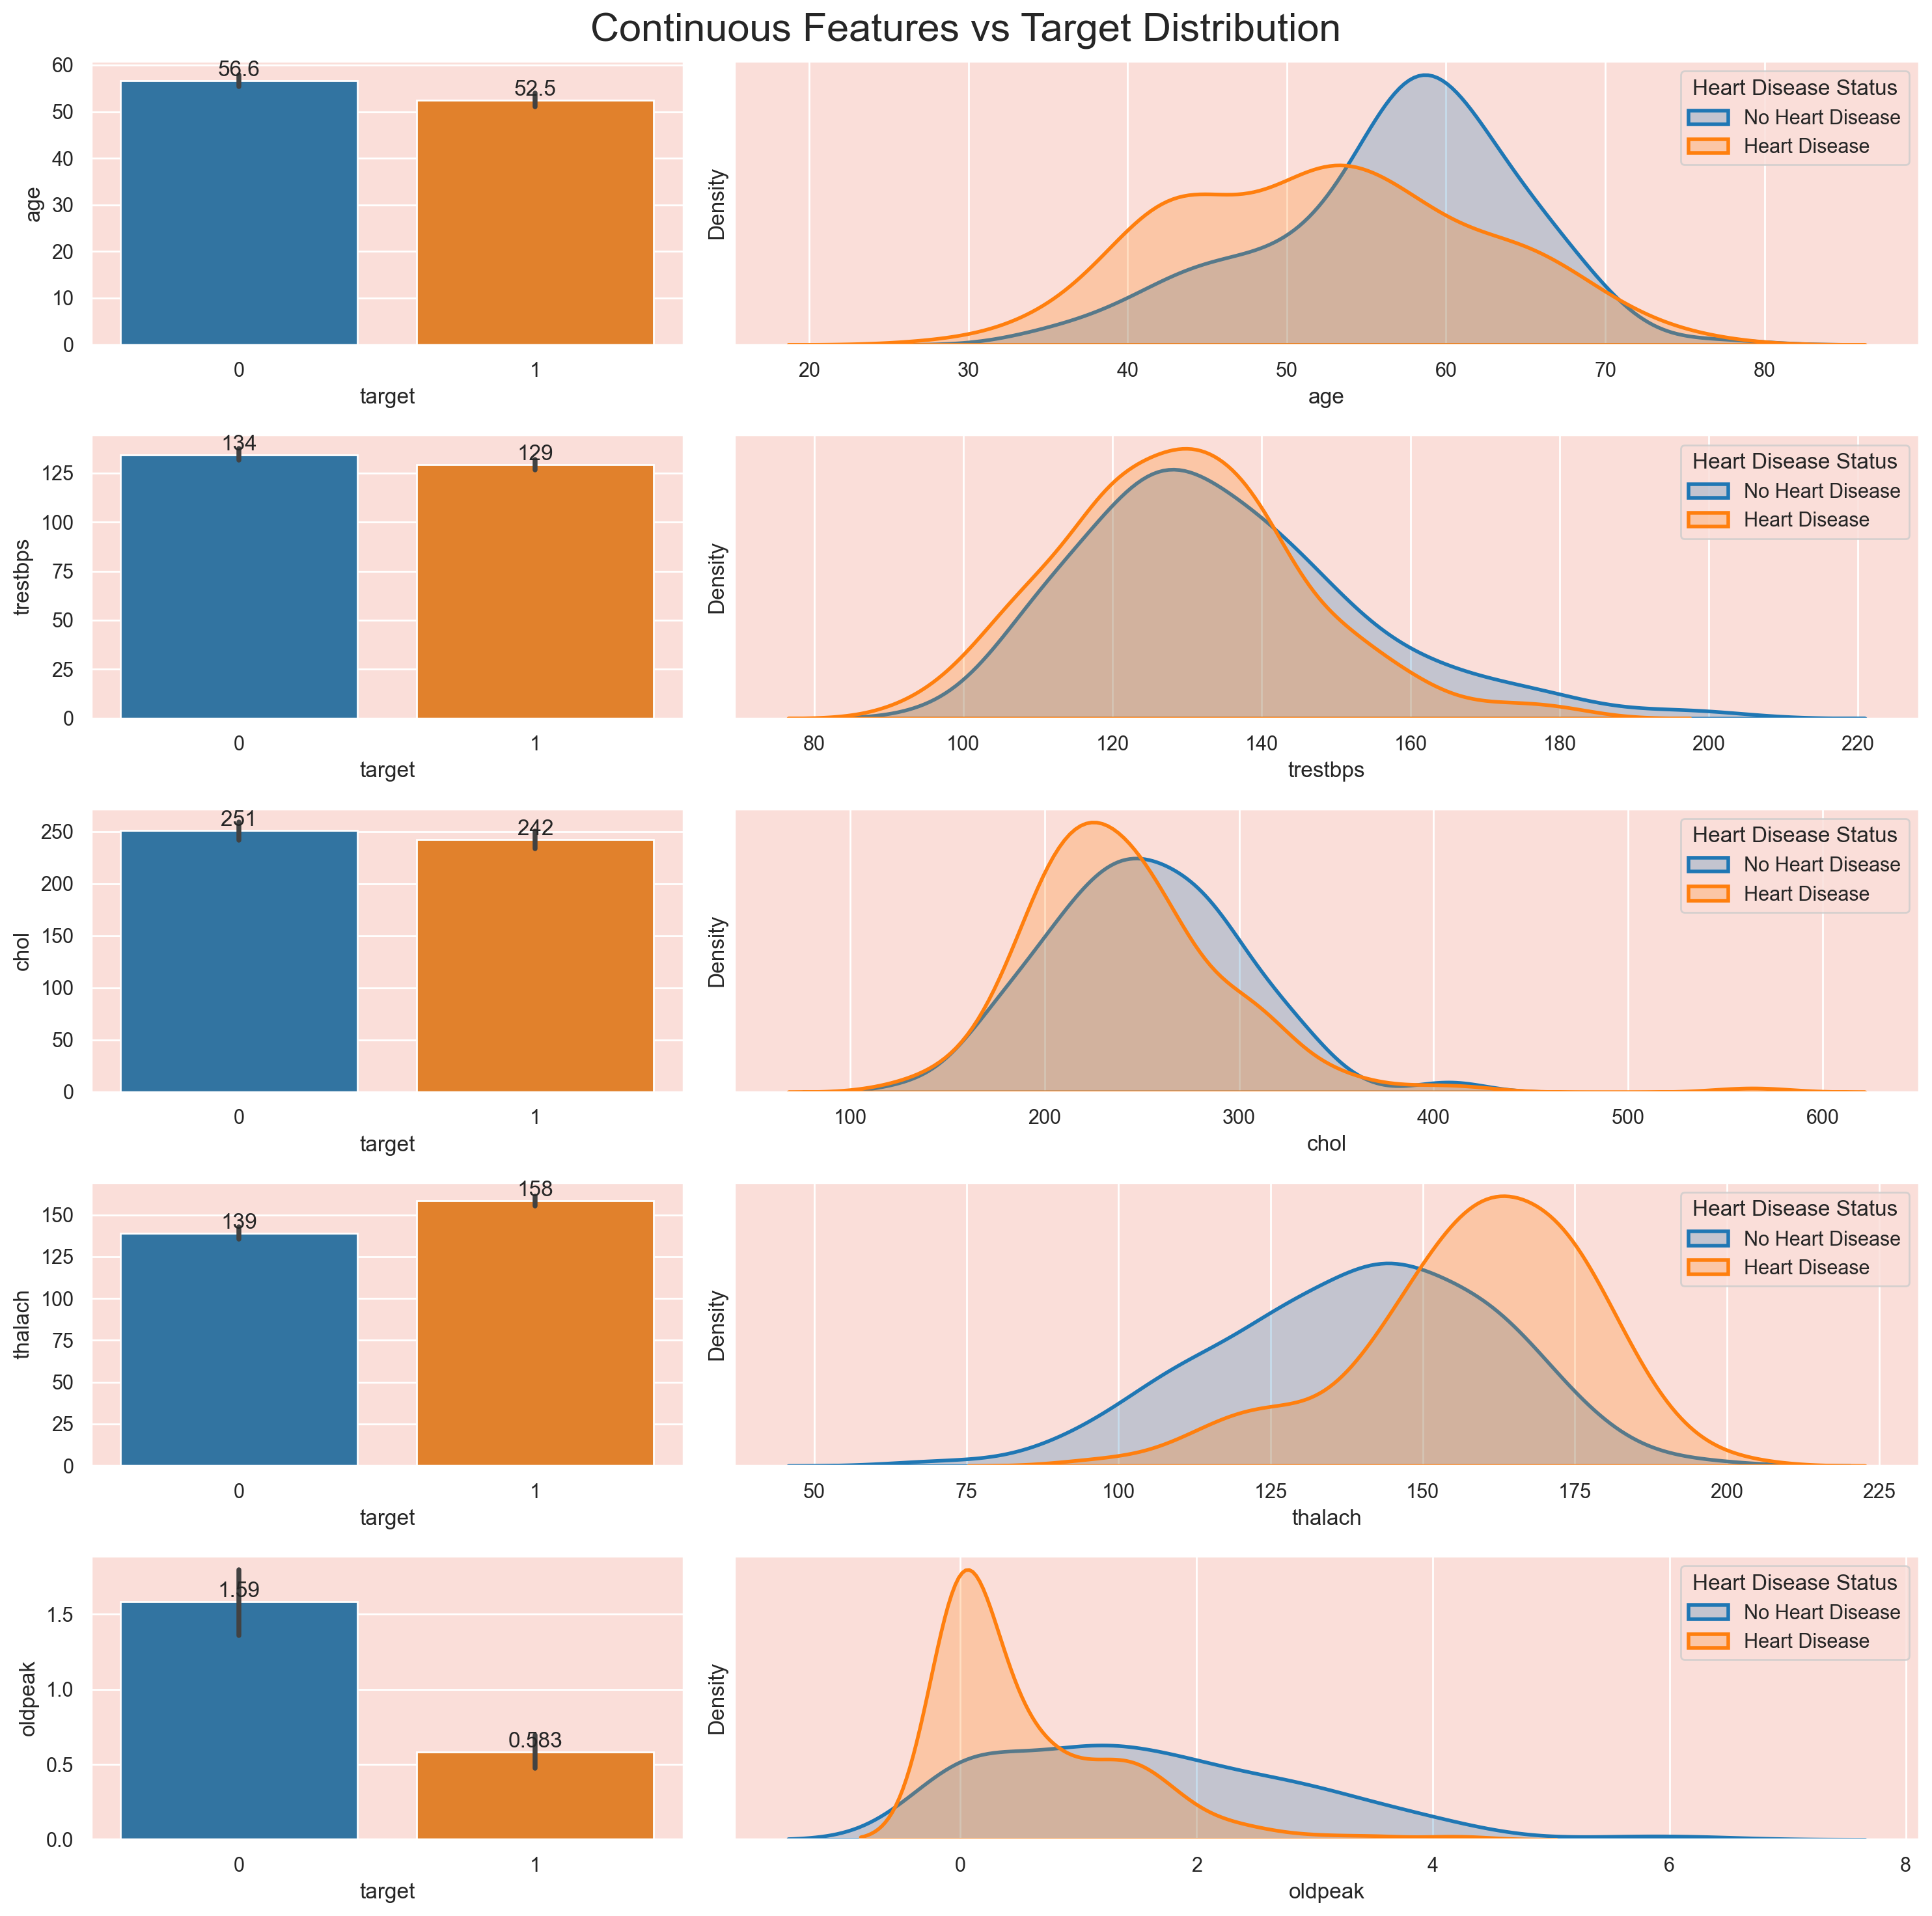

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_palette(['#1f77b4', '#ff7f0e'])  # Use a different color palette

# Create subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create bar plots and KDE plots
for i, col in enumerate(continuous_features):
    # Bar plot for mean value of the feature by target
    sns.barplot(data=df, x="target", y=col, ax=ax[i, 0])
    
    # KDE plot for the feature distribution by target
    sns.kdeplot(data=df[df["target"] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='No Heart Disease')
    sns.kdeplot(data=df[df["target"] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='Heart Disease')
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Heart Disease Status', loc='upper right')
    
    # Add mean values to the bar plot
    for container in ax[i, 0].containers:
        ax[i, 0].bar_label(container, fmt='%.3g')

# Title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


## Inferences:

* **Age (`age`)**: Patients with heart disease are generally a bit younger on average compared to those without heart disease.

* **Resting Blood Pressure (`trestbps`)**: Blood pressure values are similar for both groups, showing that this feature does not strongly differentiate between patients with and without heart disease.

* **Serum Cholesterol (`chol`)**: Cholesterol levels are close for both groups, but patients with heart disease tend to have a slightly lower average cholesterol level.

* **Maximum Heart Rate Achieved (`thalach`)**: Patients with heart disease often achieve a higher maximum heart rate during stress tests compared to those without heart disease.

* **ST Depression (`oldpeak`)**: Patients with heart disease have lower ST depression values, with their distribution centered around zero, while those without heart disease show a wider range.

**Maximum Heart Rate (`thalach`)** seems to be the most impactful feature for predicting heart disease, followed by **ST Depression (`oldpeak`)** and **Age (`age`)**.



### Categorical Features vs Target</span></b>  

## Bivariate Analysis for Categorical Features

I am going to display **100% stacked bar plots** for each categorical feature. These plots will illustrate the proportion of each category across the two target classes. Exact counts and percentages will be annotated on the bars for clarity.


In [153]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

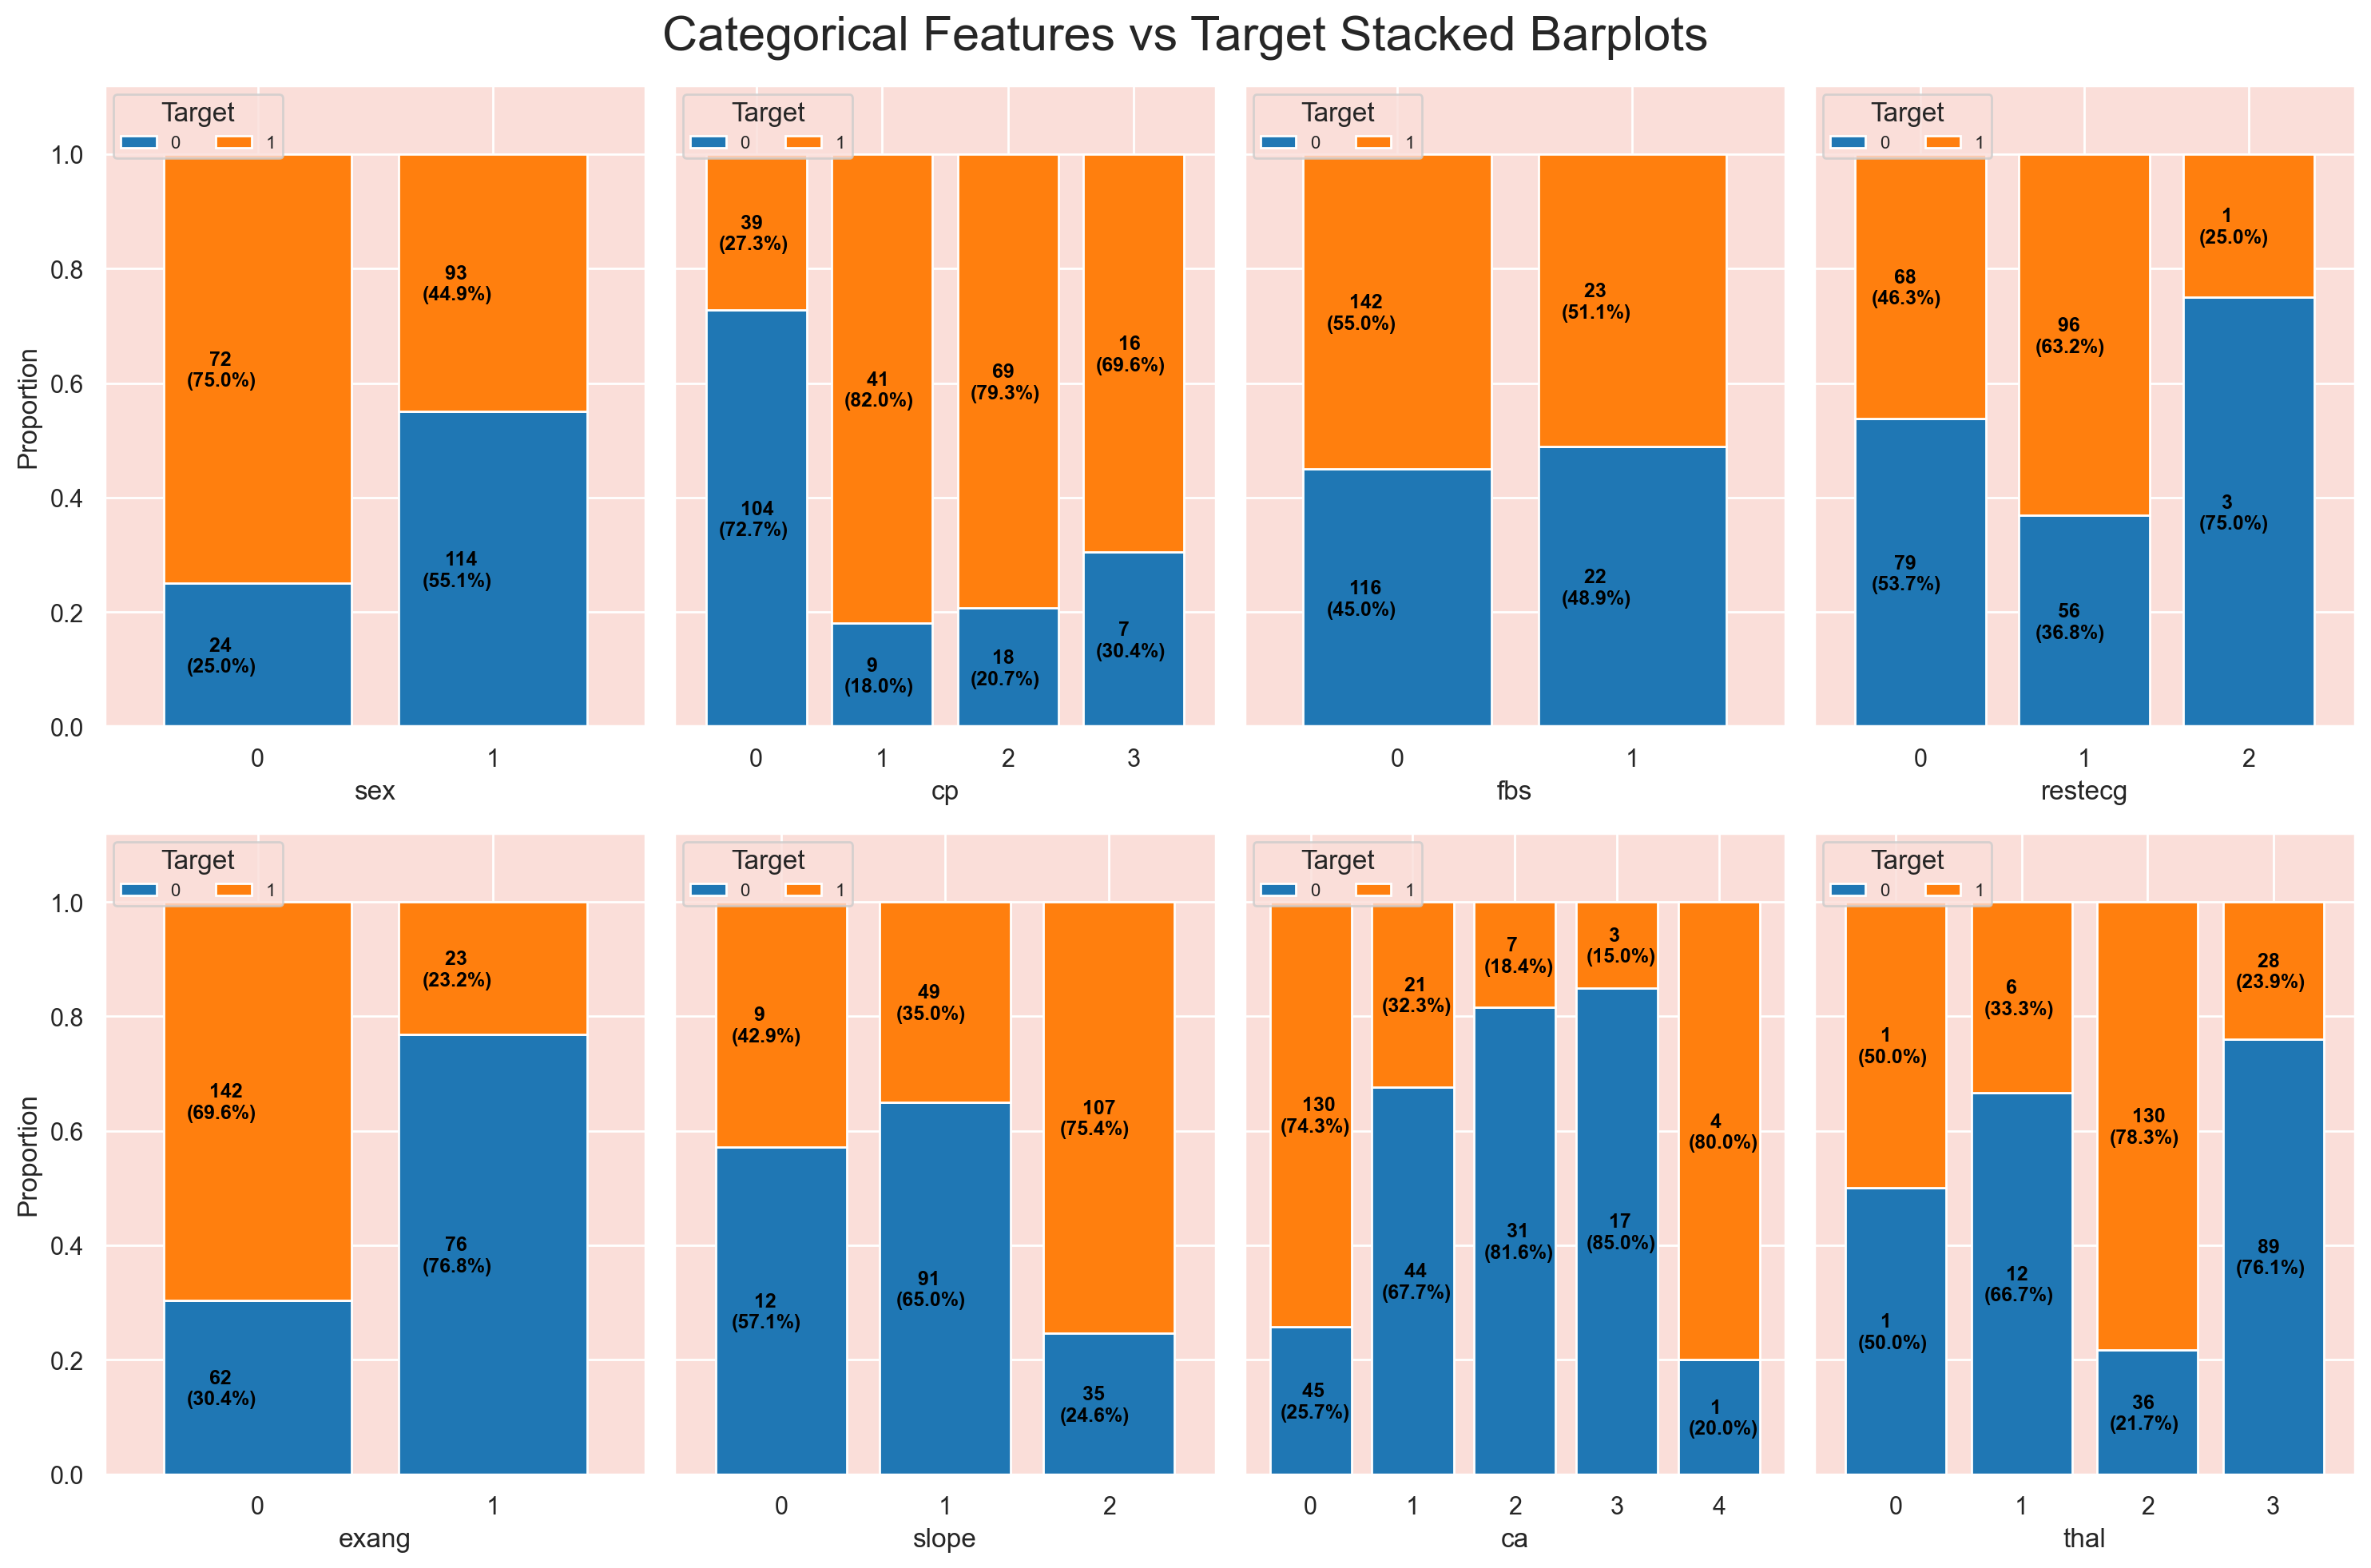

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Number of categorical features
num_features = len(categorical_features)

# Calculate number of rows and columns needed
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols  # Round up division

# Set up the subplot grid
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Define new colormap
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange colors
cmap = ListedColormap(colors)

# Loop through each categorical feature
for i, col in enumerate(categorical_features):
    # Create cross-tabulation and proportions
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')
    
    # Determine the current subplot
    row, col_idx = divmod(i, num_cols)
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[row, col_idx], stacked=True, width=0.8, colormap=cmap,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add counts and percentages to bars
    for idx, val in enumerate(cross_tab.index):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[row, col_idx].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                                  s=f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                                  color="black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[row, col_idx].legend(title='Target', loc='upper left', fontsize=8, ncol=2)
    ax[row, col_idx].set_ylim([0, 1.12])
    ax[row, col_idx].set_xticklabels(ax[row, col_idx].get_xticklabels(), rotation=0)

# Hide any unused subplots
for j in range(num_features, num_rows * num_cols):
    ax.flatten()[j].axis('off')

# Set title and layout
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


## Inferences:

* **Number of Major Vessels (`ca`)**: Patients with heart disease usually have fewer major vessels colored by fluoroscopy. Fewer colored vessels are associated with a higher proportion of heart disease, especially when there are 0 vessels colored.

* **Chest Pain Type (`cp`)**: Types 1, 2, and 3 of chest pain have a higher proportion of heart disease compared to type 0, indicating that the type of chest pain is a significant predictor.

* **Exercise Induced Angina (`exang`)**: Patients who did not experience exercise-induced angina (0) have a higher proportion of heart disease compared to those who did (1). This suggests that exercise-induced angina is an important feature for predicting heart disease.

* **Fasting Blood Sugar (`fbs`)**: The proportion of heart disease is similar between patients with fasting blood sugar > 120 mg/dl (1) and those with lower levels (0). This feature has less impact on predicting heart disease.

* **Resting Electrocardiographic Results (`restecg`)**: Type 1 shows a higher proportion of heart disease, indicating it has some influence on the outcome.

* **Sex (`sex`)**: Females (1) have a lower proportion of heart disease compared to males (0), suggesting that gender is an influential factor.

* **Slope of the Peak Exercise ST Segment (`slope`)**: Slope type 2 has a higher proportion of heart disease, indicating it is a significant predictor.

* **Thalium Stress Test Result (`thal`)**: The reversible defect category (2) has a higher proportion of heart disease, highlighting its importance in prediction.

**High Impact on Target:** `ca`, `cp`, `exang`, `sex`, `slope`, `thal`  
**Moderate Impact on Target:** `restecg`  
**Low Impact on Target:** `fbs`



# Data Preprocessing</p>



All features in the dataset appear to be relevant based on our __EDA__. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

In [155]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

### Outlier Treatment</span></b>


I am going to check for outliers using the __IQR method__ for the continuous features:

In [156]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [157]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

## Sensitivity to Outliers:

* **SVM (Support Vector Machine)**: SVMs can be influenced by outliers. Outliers affect which data points become support vectors, potentially leading to a less optimal decision boundary.

* **Decision Trees (DT) and Random Forests (RF)**: These tree-based algorithms are generally robust to outliers. Outliers usually end up in leaf nodes, which have minimal impact on the overall decision-making process.

* **K-Nearest Neighbors (KNN)**: KNN is sensitive to outliers as it relies on the distances between data points. Outliers can distort these distances, affecting the predictions.

* **AdaBoost**: This ensemble method is generally robust to outliers because it uses decision trees as weak learners. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.


### Approaches for Outlier Treatment:

* **Removal of Outliers**: Discard data points that fall outside a defined range, typically determined using methods like the Interquartile Range (IQR).

* **Capping Outliers**: Limit outliers to a specific threshold, such as the 1st or 99th percentile, rather than removing them.

* **Transformations**: Apply transformations such as log or Box-Cox to reduce the impact of outliers and make the data more Gaussian-like.

* **Robust Scaling**: Use techniques like the RobustScaler in Scikit-learn, which scales features using statistics that are robust to outliers.


### Conclusion:

Given **the nature of the algorithms (especially SVM and KNN)** and **the small size of our dataset**, direct removal of outliers might not be the best approach. Instead, **we'll focus on applying transformations like Box-Cox in the subsequent steps** to reduce the impact of outliers and make the data more suitable for modeling.



# Categorical Features Encoding</span></b>

### One-hot Encoding Decision:

Based on the feature descriptions, let's decide on one-hot encoding:

1. **Nominal Variables**: These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model.

2. **Ordinal Variables**: These variables have an inherent order. They don't necessarily need to be one-hot encoded since their order can provide meaningful information to the model.

Given the above explanation:

- **`sex`**: This is a binary variable with two categories (male and female), so it doesn't need one-hot encoding.
    
- **`cp`**: Chest pain type can be considered as nominal because there's no clear ordinal relationship among the different types of chest pain (like Typical angina, Atypical angina, etc.). It should be one-hot encoded.
    
- **`fbs`**: This is a binary variable (true or false), so it doesn't need one-hot encoding.

- **`restecg`**: This variable represents the resting electrocardiographic results. The results, such as "Normal", "Having ST-T wave abnormality", and "Showing probable or definite left ventricular hypertrophy", don't seem to have an ordinal relationship. Therefore, it should be one-hot encoded.

- **`exang`**: This is a binary variable (yes or no), so it doesn't need one-hot encoding.

- **`slope`**: This represents the slope of the peak exercise ST segment. Given the descriptions (Upsloping, Flat, Downsloping), it seems to have an ordinal nature, suggesting a particular order. Therefore, it doesn't need to be one-hot encoded.

- **`ca`**: This represents the number of major vessels colored by fluoroscopy. As it indicates a count, it has an inherent ordinal relationship. Therefore, it doesn't need to be one-hot encoded.

- **`thal`**: This variable represents the result of a thalium stress test. The different states, like "Normal", "Fixed defect", and "Reversible defect", suggest a nominal nature. Thus, it should be one-hot encoded.

#### Summary:

- **Need One-Hot Encoding**: `cp`, `restecg`, `thal`
- **Don't Need One-Hot Encoding**: `sex`, `fbs`, `exang`, `slope`, `ca`


In [158]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [159]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


In [160]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000



## Feature Scaling</span></b>

**Feature Scaling** is a crucial preprocessing step **for algorithms that are sensitive to the magnitude or scale of features**. Models like **SVM**, **KNN**, and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. **Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.**


### Why We Skip It Now:

While feature scaling is vital for some models, not all algorithms require scaled data. For instance, **Decision Tree-based models** are scale-invariant. Given our intent to use a mix of models (some requiring scaling, others not), **we've chosen to handle scaling later using pipelines**. This approach lets us apply scaling specifically for models that benefit from it, ensuring flexibility and efficiency in our modeling process.


## Transforming Skewed Features</span></b>

### Box-Cox Transformation

The **Box-Cox transformation** is a useful technique to stabilize variance and make data more normally distributed. It is particularly helpful when the distribution of the data is unknown, as it automatically finds the best power transformation. 

**Note:** The Box-Cox transformation only works for positive data, so be cautious when applying it to features that contain zeros or negative values.


### Transforming Skewed Features & Data Leakage Concerns

When preprocessing data, especially when applying transformations like the Box-Cox, it's crucial to avoid **data leakage**. Data leakage happens when information from outside the training dataset is used to transform or train the model, leading to overly optimistic performance metrics.

### To avoid data leakage and ensure our model generalizes well to unseen data:

1. **Data Splitting:** 
   - First, split the dataset into a training set and a test set. This ensures that we have a separate set of data to evaluate the model's performance, untouched during the training and preprocessing phases.

2. **Box-Cox Transformation:** 
   - Examine the distribution of continuous features in the training set. If they appear skewed, apply the Box-Cox transformation to stabilize variance and make the data more normal-distribution-like.
   - Determine the Box-Cox transformation parameters **solely** based on the training data.

3. **Applying Transformations to Test Data:** 
   - Once the transformation parameters are determined from the training set, use these exact parameters to transform the validation/test set. This ensures no information from the validation/test set leaks into the training process.

4. **Hyperparameter Tuning & Cross-Validation:** 
   - Use **cross-validation on the training set** for hyperparameter tuning. This allows for a better estimate of the model's performance on unseen data without using the test set.
   - The test set remains untouched during this phase and is only used to evaluate the final model's performance.

By following this structured approach, we ensure a rigorous training process, minimize the risk of data leakage, and obtain a realistic measure of the model's performance on unseen data.


In [161]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [162]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [163]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Box-Cox Transformation for oldpeak

The Box-Cox transformation requires all data to be strictly positive. To transform the oldpeak feature using Box-Cox, we can add a small constant (e.g., 0.001) to ensure all values are positive.


In [164]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

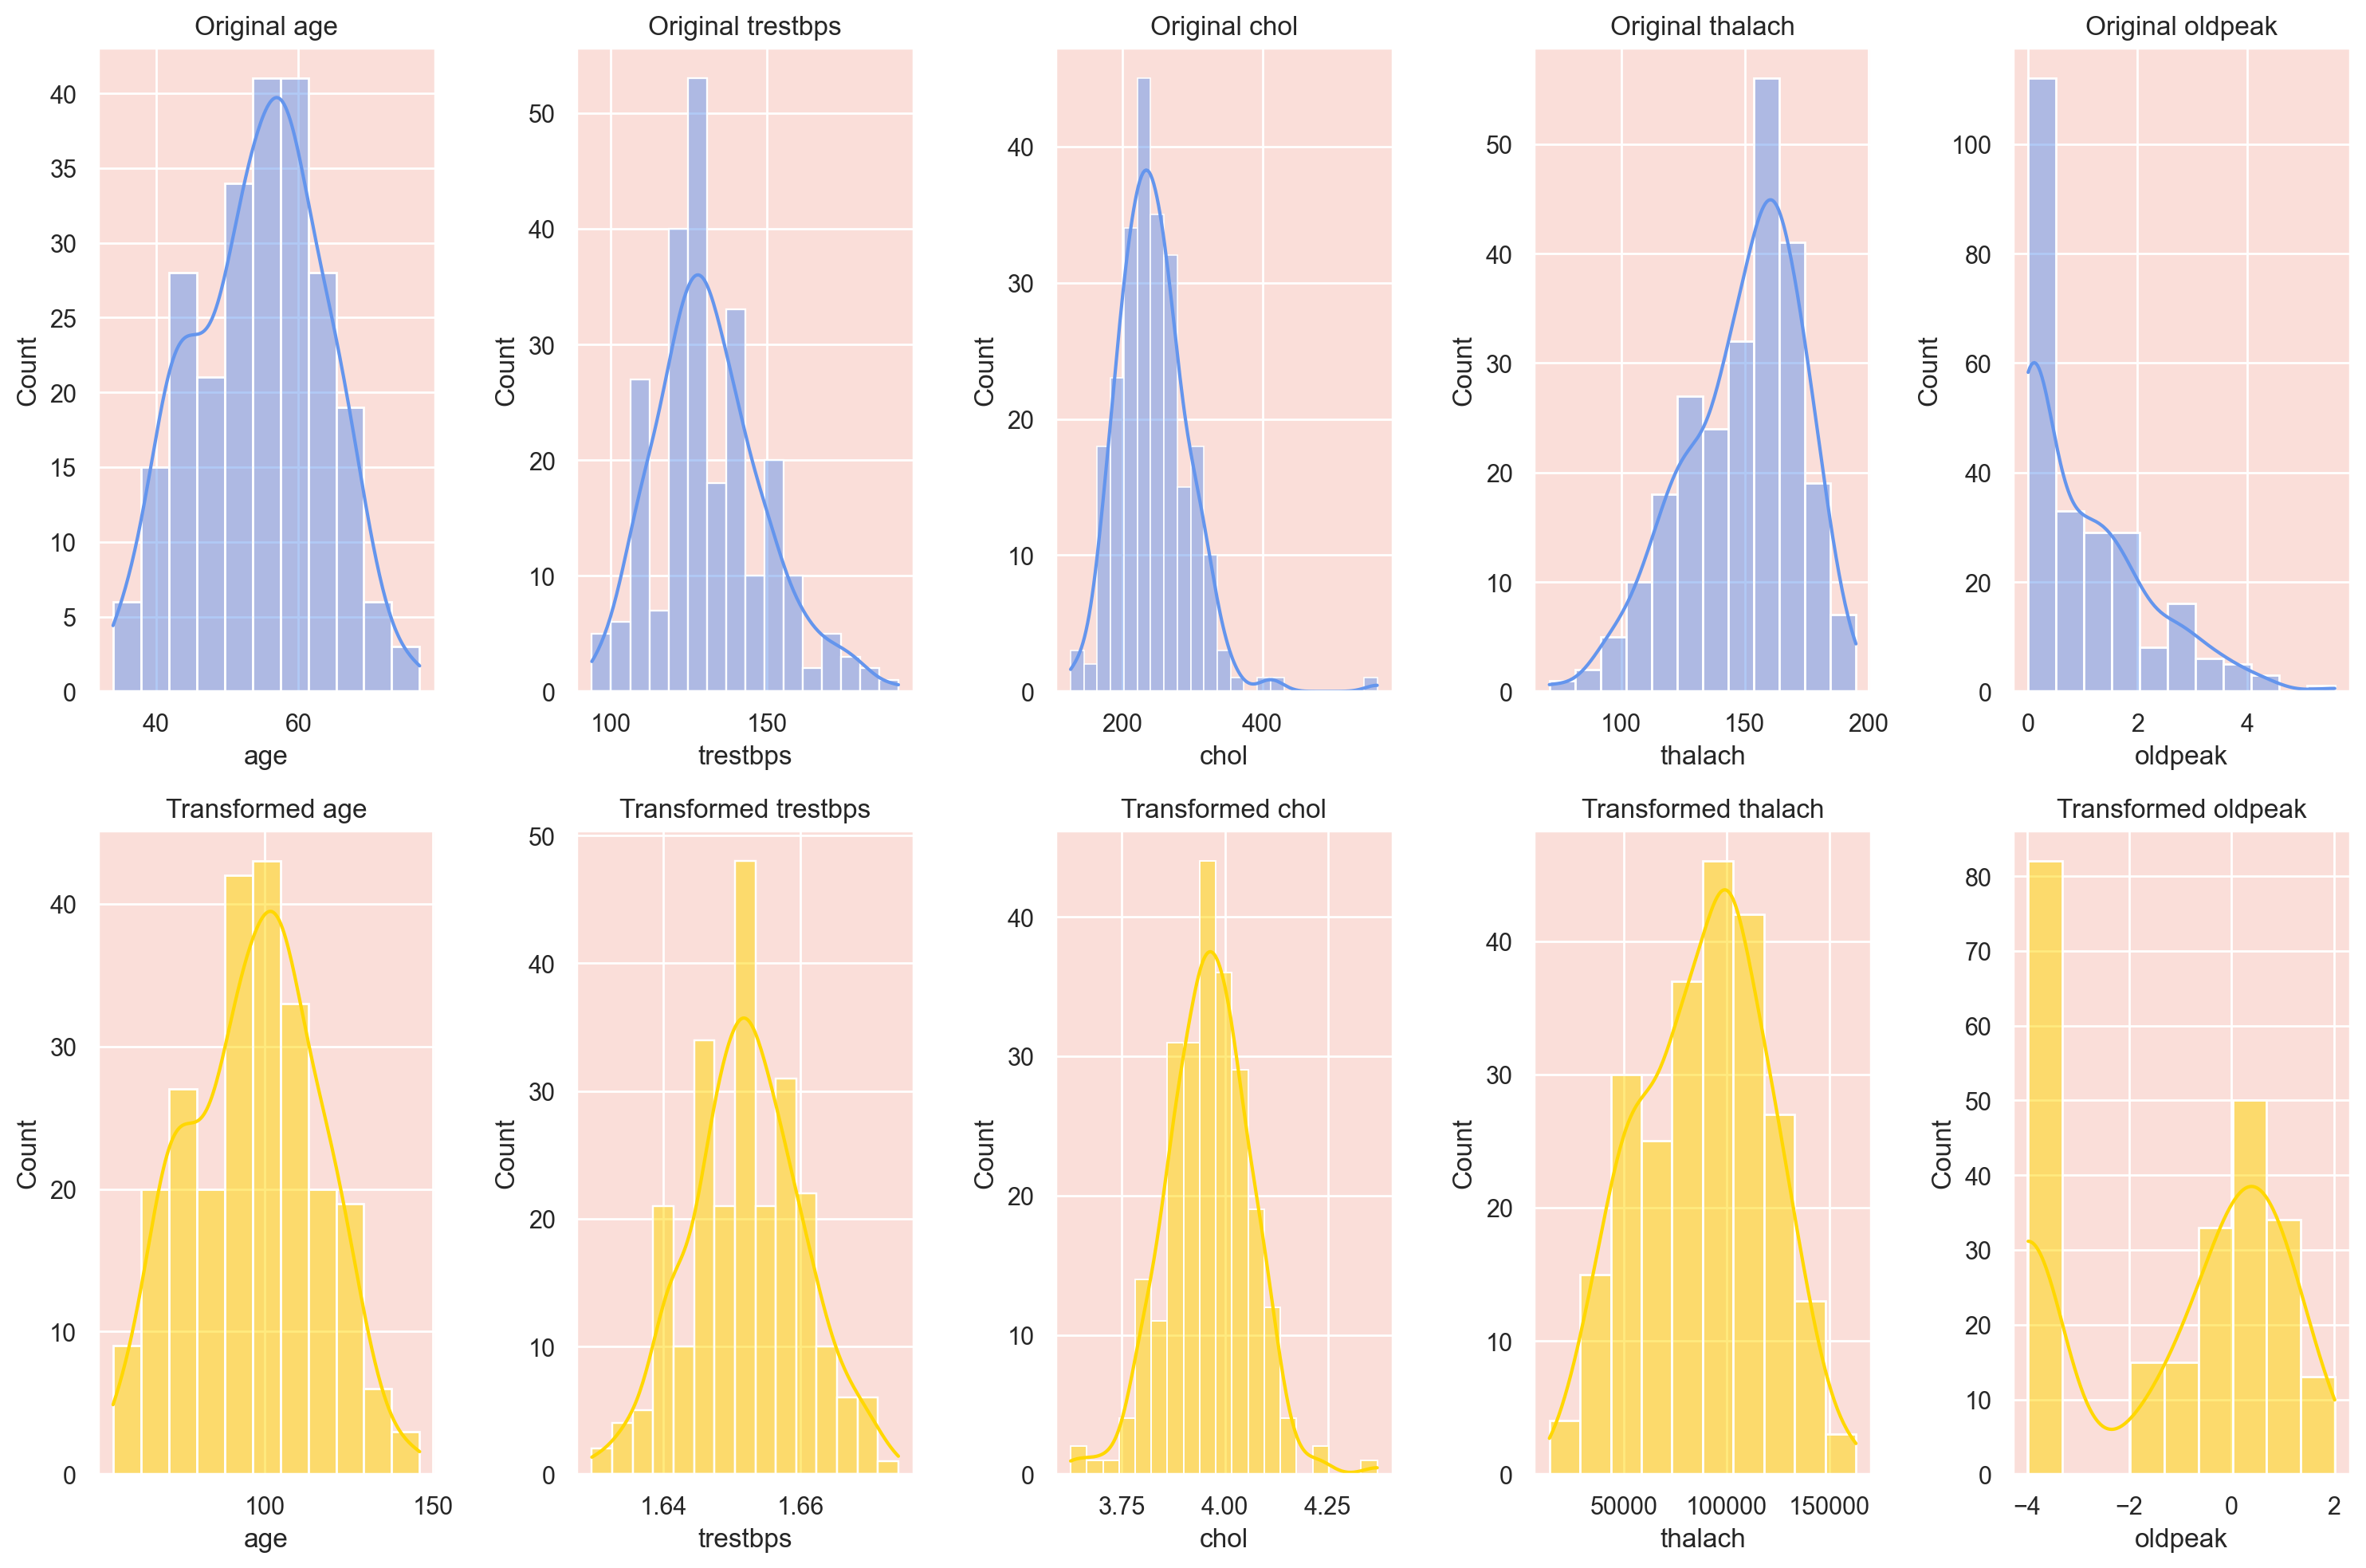

In [165]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#6495ED').set_title(f'Original {col}')  # Cornflower Blue

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply Box-Cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='#FFD700').set_title(f'Transformed {col}')  # Gold
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='#FF4500').set_title(f'{col} (Not Transformed)')  # OrangeRed

fig.tight_layout()
plt.show()


### Inference:

1. **`age`:** 
   - The transformation has made the `age` distribution more symmetric, bringing it closer to a normal distribution.

2. **`trestbps`:** 
   - The distribution of `trestbps` post-transformation appears more normal-like, with reduced skewness.

3. **`chol`:** 
   - After applying the Box-Cox transformation, `chol` exhibits a shape more aligned with a normal distribution.

4. **`thalach`:** 
   - The `thalach` feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

5. **`oldpeak`:** 
   - The transformation improved the `oldpeak` distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.


### Conclusion:

Transforming features to be more normal-like primarily helps in mitigating the impact of outliers, which is particularly beneficial for distance-based algorithms like **SVM** and **KNN**. By reducing the influence of **outliers**, these algorithms can compute distances more effectively and produce more reliable results.


In [196]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,99.775303,1,1.652121,4.044510,1,34193.175862,1,0.490856,0,0,False,False,False,False,False,False,False,True
191,104.060224,1,1.651136,3.909224,0,61564.541974,1,0.846853,1,3,False,False,False,False,False,False,False,True
15,87.096543,0,1.646937,3.916242,0,97354.732537,0,0.490856,1,0,False,True,False,True,False,False,True,False
224,95.519131,1,1.641028,3.960430,0,55975.802227,1,1.130195,1,1,False,False,False,True,False,False,False,True
250,89.190680,1,1.656716,4.069854,0,51729.405015,1,1.634849,1,3,False,False,False,True,False,False,False,True


# MODEL BUILDING

## Decision Tree </p>


In [230]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model with the training data
decision_tree.fit(X_train, y_train)

# Predict on the training data
y_train_pred = decision_tree.predict(X_train)

# Predict on the testing data
y_test_pred = decision_tree.predict(X_test)

# Generate classification report for testing data
print("Classification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=['0','1']))


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        28
           1       0.71      0.67      0.69        33

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



### Decision Tree  Hyperparameter Tuning</span></b>

### Note:

In medical scenarios, especially when diagnosing illnesses, it’s often more important to have a high recall (sensitivity) for the positive class (patients with the condition). A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it’s generally better to have a few false alarms than to miss diagnosing a patient with a potential illness.


### Hyperparameter Tuning for Optimal Recall

I am establishing a function to determine the optimal set of hyperparameters that yield the highest **recall** for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models.


In [168]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters



I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our DT model:

In [169]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [204]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(decision_tree, param_grid_dt, X_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [214]:
# A function to calculate scores and confusion matrix.
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
def scores( y_test, y_preds):
    accuracy = round(accuracy_score(y_test, y_preds) * 100,3) 
    recall = round(recall_score(y_test, y_preds) * 100,3)
    precision = round(precision_score(y_test, y_preds) * 100,3) 
    f1 = round(f1_score(y_test, y_preds) * 100,3) 
    
    score_set = [accuracy,recall,precision,f1]

    print(f'accuracy: {accuracy} %')
    print(f'recall: {recall} %')
    print(f'precision: {precision} %')
    print(f'f1: {f1} %\n')
    print('--'*40,f'\nClassification Report:\n{classification_report(y_test, y_preds)}\n' + '--' * 40)
    return score_set

In [215]:
# Evaluate the optimized model on the test data
dct_score = scores(y_test,best_dt.predict(X_test))

accuracy: 78.689 %
recall: 84.848 %
precision: 77.778 %
f1: 81.159 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

--------------------------------------------------------------------------------


## Random Forest Classifier</p>


In [176]:
rf_base = RandomForestClassifier(random_state=0)

### RF Hyperparameter Tuning</span></b>


    
Afterward, I am setting up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our RF model:

In [177]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [216]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


In [218]:
# Evaluate the optimized model on the test data
RF_score = scores(y_test,best_rf.predict(X_test))

accuracy: 83.607 %
recall: 87.879 %
precision: 82.857 %
f1: 85.294 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

--------------------------------------------------------------------------------


## K-Nearest Neighbors (KNN)</p>



First of all, let's define the base KNN model and set up the pipeline with scaling:

In [182]:
# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

KNN Hyperparameter Tuning</span></b>


I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our KNN pipeline:

In [219]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [220]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


In [221]:
# Evaluate the optimized model on the test data
KNN_score = scores(y_test,best_knn.predict(X_test))

accuracy: 83.607 %
recall: 84.848 %
precision: 84.848 %
f1: 84.848 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

--------------------------------------------------------------------------------


## Support Vector Machines (SVM)</p>



First, let's define the base SVM model and set up the pipeline with scaling:

In [188]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

 SVM Hyperparameter Tuning</span></b>


Let's configure the hyperparameters grid and employ the __tune_clf_hyperparameters__ function to determine the best hyperparameters for our SVM pipeline:

In [222]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [223]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [225]:
# Evaluate the optimized model on the test data
SVM_score = scores(y_test,best_svm.predict(X_test))

accuracy: 78.689 %
recall: 96.97 %
precision: 72.727 %
f1: 83.117 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61

--------------------------------------------------------------------------------


## Inference:

The **recall of 0.97 for class 1** shows that the model is very effective at identifying patients with heart disease, catching almost all true positive cases. This is crucial in medical settings to avoid missing any potential cases of heart disease.

The **F1-score of 0.83 for class 1** indicates that the model is not just focusing on recall but also maintaining a good balance with precision. This means that while it is good at identifying patients with the condition, it doesn't result in an excessive number of false positives, keeping the number of unnecessary examinations manageable.

Overall, the model performs well for medical diagnostics, prioritizing accurate detection of heart disease while keeping false alarms at a reasonable level.


In [229]:
score_names = ['accuracy','recall','precision','f1 score']
all_score = [KNN_score , dct_score, SVM_score, RF_score]
score_df = pd.DataFrame(all_score, columns = score_names,
                       index = ['KNN','DecisionTree','SVM','RandomForest'])
#score_df.style.highlight_max(color = 'green', axis = 0)
score_df

,accuracy,recall,precision,f1 score
KNN,83.607,84.848,84.848,84.848
DecisionTree,83.607,87.879,82.857,85.294
SVM,78.689,96.970,72.727,83.117
RandomForest,83.607,87.879,82.857,85.294


## Model Performance:

The **SVM model shows excellent performance in identifying potential heart patients**. With a recall of 0.97 for class 1, it correctly identifies nearly all patients with heart disease, which is crucial in a medical context. 

Moreover, the model maintains a good balance, ensuring that while it achieves high recall, it also keeps precision in check. This prevents the system from being overwhelmed with unnecessary alerts for healthy individuals.


## Conclusion</p>

In diagnosing heart disease, our main goal is to **achieve a high recall for the positive class**. This means accurately identifying every potential case of heart disease, as missing even one case could be very serious. 

However, while aiming for high recall, we must also ensure that the model does not lead to unnecessary medical interventions for healthy individuals. We will now evaluate our models based on these important medical criteria.

